In [274]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

### Step 1: Data Load

In [275]:
Missing_Values = ["inf","missing","Select"]
path="C:/Users/Nitish/Documents/upGrad"
Leads_df = pd.read_csv(path+"/Leads.csv",low_memory=False,keep_default_na = True, na_values = Missing_Values, sep=",", encoding="ISO-8859-1", header=0)
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [276]:
# Let's check the dimensions of the dataframe
Leads_df.shape

(9240, 37)

In [277]:
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

### Step 2 : Clean and Prepare Data

In [278]:
# missing values
round(100*(Leads_df.isnull().sum())/len(Leads_df), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [279]:
### Analyze the Categorical columns
cu = []
i = []
for col in Leads_df.select_dtypes(exclude=np.number).columns:
    cu.append(Leads_df[col].unique())
    i.append(col)

pd.DataFrame( cu, index=i).T

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,NaN,NaN,Unemployed,...,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,Landing Page Submission,Organic Search,Yes,Yes,Email Opened,India,Business Administration,Word Of Mouth,Student,...,NaN,None,None,Potential Lead,Mumbai,01.High,01.High,None,Yes,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Lead Add Form,Direct Traffic,None,None,Unreachable,Russia,Media and Advertising,Other,NaN,...,Might be,None,None,Other Leads,Thane & Outskirts,03.Low,03.Low,None,None,Page Visited on Website
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Lead Import,Google,None,None,Converted to Lead,Kuwait,Supply Chain Management,Online Search,Working Professional,...,Not Sure,None,None,Lateral Student,Other Metro Cities,NaN,NaN,None,None,Email Bounced
4,3256f628-e534-4826-9d63-4a8b88782852,Quick Add Form,Referral Sites,None,None,Olark Chat Conversation,Oman,IT Projects Management,Multiple Sources,Businessman,...,Worst,None,None,Dual Specialization Student,Other Cities,None,None,None,None,Email Link Clicked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9236,82a7005b-7196-4d56-95ce-a79f937a158d,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [280]:
Leads_df.select_dtypes(exclude=np.number).describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,5860,1990,6550,...,4473,9240,9240,2385,5571,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,18,9,6,...,5,1,1,5,6,3,3,1,2,16
top,fbd84c6c-3485-4d52-a00f-65f6510e92e0,Landing Page Submission,Google,No,No,Email Opened,India,Finance Management,Online Search,Unemployed,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,976,808,5600,...,1560,9240,9240,1613,3222,3839,2788,9240,6352,3407


In [281]:
Leads_df.select_dtypes(include=np.number).describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [282]:
### Remove the Columns which has 25% or more null values
Leads_df=Leads_df[Leads_df.columns[Leads_df.isna().sum()*100/Leads_df.shape[0]<=25]]
Leads_df.shape

(9240, 24)

In [283]:
# missing values
round(100*(Leads_df.isnull().sum())/len(Leads_df), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [284]:
### Remove Null rows for Total Visit
Leads_df = Leads_df[~np.isnan(Leads_df['TotalVisits'])]

In [285]:
### Check the rows now
Leads_df.shape

(9103, 24)

In [286]:
# missing values
round(100*(Leads_df.isnull().sum())/len(Leads_df), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.32
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [287]:
### Check Lead Source column
Leads_df['Lead Source'].describe()

count       9074
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [288]:
### How many rows are null 
Leads_df['Lead Source'].isnull().sum()

29

In [289]:
### As the number of Rows is very marginal I choose to replace NA with Google and Google is quite common mediam of geting informtion.

Leads_df['Lead Source'].fillna('Google',inplace=True)

In [290]:
### Check Lead Source column
Leads_df['Lead Source'].describe()

count       9103
unique        21
top       Google
freq        2897
Name: Lead Source, dtype: object

In [291]:
### How many rows are null 
Leads_df['Lead Source'].isnull().sum()

0

In [292]:
# missing values
round(100*(Leads_df.isnull().sum())/len(Leads_df), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [293]:
###  Check Numeric variables
Leads_df.select_dtypes(include=np.number).describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [294]:
### Check Categorical Variables
Leads_df.select_dtypes(exclude=np.number).describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103
unique,9103,4,21,2,2,17,2,1,2,2,2,2,2,1,1,1,1,2,16
top,fbd84c6c-3485-4d52-a00f-65f6510e92e0,Landing Page Submission,Google,No,No,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2897,8379,9101,3437,9089,9103,9101,9102,9102,9099,9096,9103,9103,9103,9103,6215,3270


In [295]:
### Find the unique values for each column
Categorical_columns = Leads_df.select_dtypes(exclude=np.number).columns
Categorical_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [296]:
cu = []
i = []
for col in Categorical_columns:
    cu.append(Leads_df[col].unique())
    i.append(col)

pd.DataFrame( cu, index=i).T

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,Landing Page Submission,Organic Search,Yes,Yes,Email Opened,Yes,None,Yes,Yes,Yes,Yes,Yes,None,None,None,None,Yes,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Lead Add Form,Direct Traffic,None,None,Unreachable,None,None,None,None,None,None,None,None,None,None,None,None,Page Visited on Website
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Lead Import,Google,None,None,Converted to Lead,None,None,None,None,None,None,None,None,None,None,None,None,Email Bounced
4,3256f628-e534-4826-9d63-4a8b88782852,None,Referral Sites,None,None,Olark Chat Conversation,None,None,None,None,None,None,None,None,None,None,None,None,Email Link Clicked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9098,19d6451e-fcd6-407c-b83b-48e1af805ea9,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9099,82a7005b-7196-4d56-95ce-a79f937a158d,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9100,aac550fe-a586-452d-8d3c-f1b62c94e02c,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9101,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [297]:
for col in Categorical_columns:
    print(Leads_df[col].unique())

['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
['No' 'Yes']
['No' 'Yes']
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' 'SMS Sent'
 'Visited Booth in Tradeshow' 'Approached upfront'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
['No' 'Yes'

In [298]:
### Find the List of the columns which should be converted into Binary 0,1
_1_0_Columns = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
_1_0_Columns

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

#####  These Columns has Yes and No values. However some of the columns has only single value.
#####  As Single value columns does not have variance which will help in analysis, we can remove these columns. 

In [299]:
### drop single values columns except magazine as its a Given Dummy  column for Source
Leads_df=Leads_df.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [300]:

for col in Leads_df.select_dtypes(exclude=np.number).columns:
    print(Leads_df[col].unique())

['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
['No' 'Yes']
['No' 'Yes']
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' 'SMS Sent'
 'Visited Booth in Tradeshow' 'Approached upfront'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
['No' 'Yes'

### Step 3 : Data Preparation

In [301]:
Leads_df.select_dtypes(exclude=np.number).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [302]:
#### Converting some binary variables (Yes/No) to 0/1
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads_df[varlist] = Leads_df[varlist].apply(binary_map)

In [303]:
Leads_df[varlist].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [304]:
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,Modified


In [305]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
Leads_df = pd.concat([Leads_df, dummy1], axis=1)

In [306]:
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [307]:
# We have created dummies for the below variables, so we can drop them
Leads_df = Leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], 1)

In [308]:
Leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearn

In [309]:
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 70 columns):
Prospect ID                                           9103 non-null object
Lead Number                                           9103 non-null int64
Do Not Email                                          9103 non-null int64
Do Not Call                                           9103 non-null int64
Converted                                             9103 non-null int64
TotalVisits                                           9103 non-null float64
Total Time Spent on Website                           9103 non-null int64
Page Views Per Visit                                  9103 non-null float64
Search                                                9103 non-null int64
Magazine                                              9103 non-null int64
Newspaper Article                                     9103 non-null int64
X Education Forums                                    9103 non-null int64


#### Checking for Outliers

In [310]:
# Checking for outliers in the continuous variables
num_Leads_df = Leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [311]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


In [312]:
### We could see outlier in that data. So I will keep data till 99 Percentile.
Leads_df = Leads_df[Leads_df['TotalVisits']<= Leads_df['TotalVisits'].quantile(0.99)]

In [313]:
# Checking for outliers in the continuous variables
num_Leads_df = Leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_Leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9020.000000,9020.000000,9020.000000
mean,3.206984,479.759534,2.337271
std,2.990108,544.688157,2.062363
min,0.000000,0.000000,0.000000
25%,1.000000,7.000000,1.000000
50%,3.000000,243.000000,2.000000
75%,5.000000,915.250000,3.000000
90%,7.000000,1371.000000,5.000000
95%,9.000000,1554.050000,6.000000
99%,13.810000,1836.620000,9.000000


##### Now we can see Gradual Increament in data. So outliers are removed

### Step 4 Create Train and Test Data Set

In [314]:
from sklearn.model_selection import train_test_split
Leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearn

In [315]:
# Putting feature variable to X
X = Leads_df.drop(['Prospect ID', 'Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [316]:
# Putting response variable to y
y = Leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [317]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [318]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2873,0,0,0.271781,0.031598,0.814423,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6823,0,0,1.276480,2.389158,2.274024,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7258,0,0,-1.067817,-0.874028,-1.131710,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8327,0,0,1.611379,1.982176,0.167334,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5940,1,0,-0.732918,-0.701703,-0.645177,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [319]:
### Checking the Churn Rate
Converted = (sum(Leads_df['Converted'])/len(Leads_df['Converted'].index))*100
Converted

37.971175166297115

### Step 6: Looking at Correlations

In [320]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

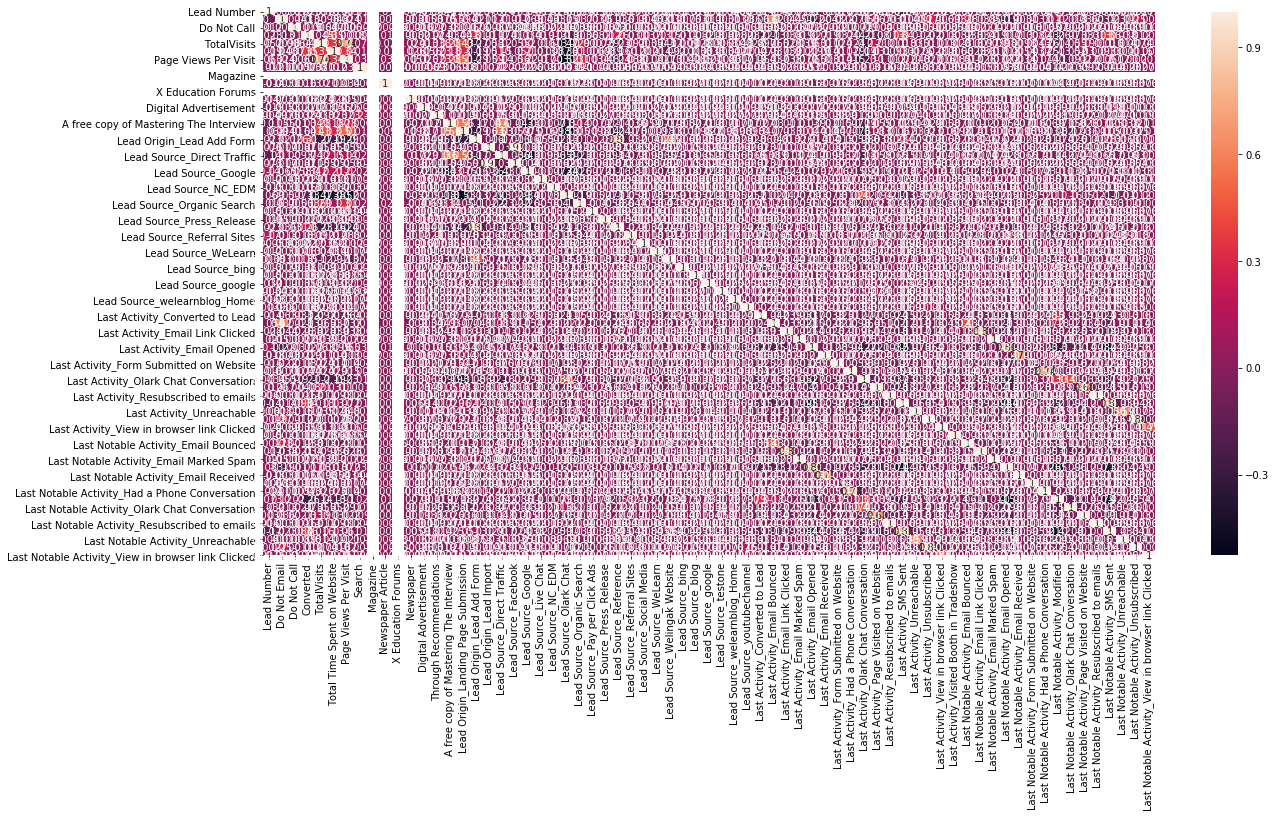

In [321]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads_df.corr(),annot = True)
plt.show()

### Step 7: Feature Selection Using RFE

In [322]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [323]:
from sklearn.feature_selection import RFE
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)

In [324]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False])

In [325]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Search', False, 36),
 ('Magazine', False, 48),
 ('Newspaper Article', False, 11),
 ('X Education Forums', False, 47),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 46),
 ('Through Recommendations', False, 3),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', False, 41),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_NC_EDM', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 49),
 ('Lead Source_Press_Release', False, 33),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_R

In [326]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

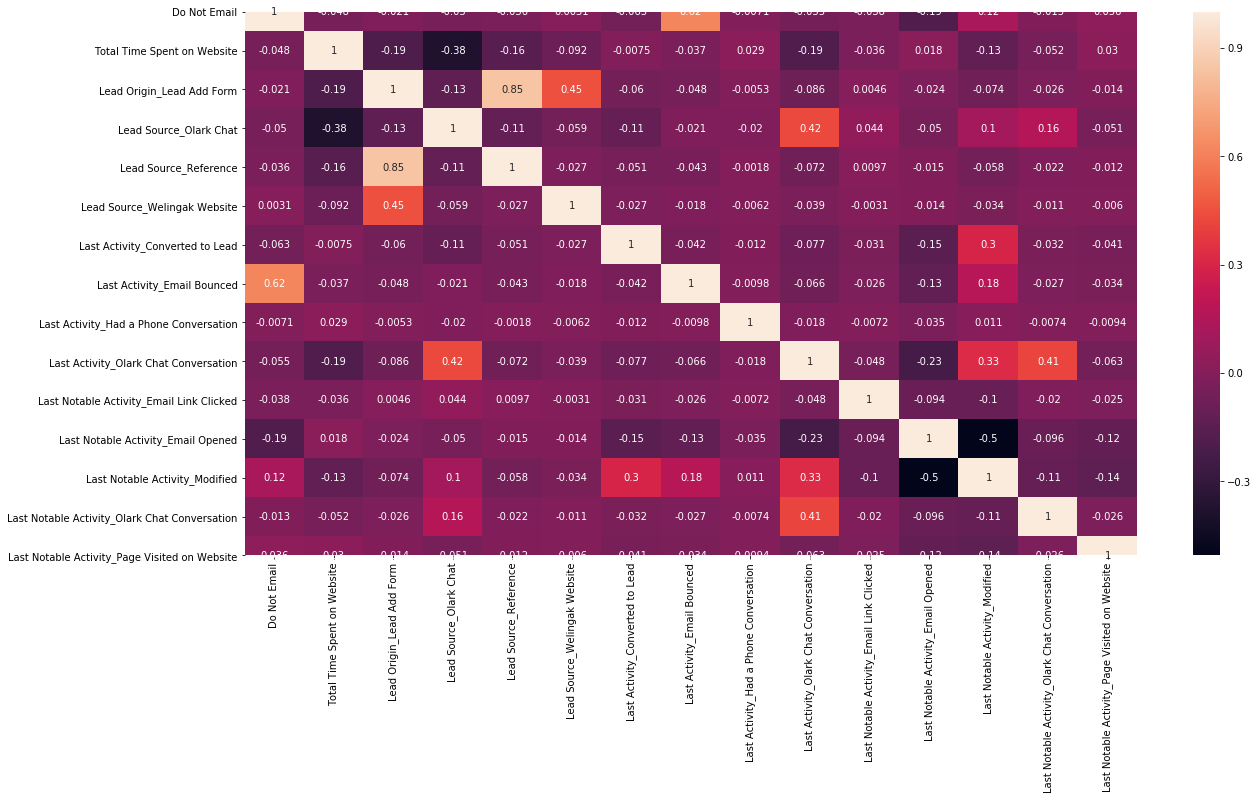

In [327]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads_df[col].corr(),annot = True)
plt.show()

### Step 8: Build the Model

In [328]:
##### Assessing the model with StatsModels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.8
Date:                Mon, 02 Mar 2020   Deviance:                       5515.6
Time:                        20:29:55   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3132      0.067      4.660      0.000       0.182       0.445
Do Not Email                                     -1.4470      0.189     -7.669      0.000      -1.817      -1.077
Total Time Spent on Website                       1.1444      0.039     29.052      0.000       1.067       1.222
Lead Origin_Lead Add Form                         3.6507      0.638      5.720      0.000       2.400       4.902
Lead Source_Olark Chat                            1.1925      0.101     11.810      0.000       0.995       1.390
Lead Source_Reference                             0.7593      0.674      1.126      0.260      -0.562       2.081
Lead Source_Welingak Website                      2.1425      0.961      2.230      0.026       0.259       4.026
Last Activity_Converted to Lead                  -1.0916      0.218     -5.016      0.000      -1.518      -0.665
Last Activity_Email Bounced                      -1.3324      0.406     -3.284      0.001      -2.128      -0.537
Last Activity_Had a Phone Conversation            1.5510      0.719      2.156      0.031       0.141       2.961
Last Activity_Olark Chat Conversation            -1.4089      0.188     -7.475      0.000      -1.778      -1.039
Last Notable Activity_Email Link Clicked         -1.9703      0.251     -7.861      0.000      -2.462      -1.479
Last Notable Activity_Email Opened               -1.4452      0.086    -16.816      0.000      -1.614      -1.277
Last Notable Activity_Modified                   -1.7236      0.098    -17.620      0.000      -1.915      -1.532
Last Notable Activity_Olark Chat Conversation    -1.2433      0.333     -3.729      0.000      -1.897      -0.590
Last Notable Activity_Page Visited on Website    -1.7343      0.203     -8.537      0.000      -2.132      -1.336
=================================================================================================================
"""

In [329]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2873    0.250528
6823    0.954665
7258    0.067419
8327    0.482334
5940    0.006741
5686    0.919435
5372    0.795961
4736    0.196861
5812    0.880733
893     0.409038
dtype: float64

In [330]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2505279 , 0.95466465, 0.0674187 , 0.48233432, 0.00674095,
       0.91943466, 0.79596061, 0.19686066, 0.88073251, 0.40903765])

In [331]:
y_train.index

Int64Index([2873, 6823, 7258, 8327, 5940, 5686, 5372, 4736, 5812,  893,
            ...
            4492,  843, 5789, 8113, 4261,  368,   82, 8250, 7116, 5783],
           dtype='int64', length=6314)

In [332]:
y_train.head()

2873    1
6823    1
7258    0
8327    1
5940    0
Name: Converted, dtype: int64

In [333]:
##### Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number
0,1,0.250528,2873
1,1,0.954665,6823
2,0,0.067419,7258
3,1,0.482334,8327
4,0,0.006741,5940


In [334]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted
0,1,0.250528,2873,0
1,1,0.954665,6823,1
2,0,0.067419,7258,0
3,1,0.482334,8327,0
4,0,0.006741,5940,0


In [335]:


### Confusion Metrics
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3458  479]
 [ 777 1600]]


In [336]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8010769718086791


#### Checking VIFs

In [337]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,17.34
4,Lead Source_Reference,13.42
5,Lead Source_Welingak Website,4.86
9,Last Activity_Olark Chat Conversation,2.05
12,Last Notable Activity_Modified,1.90
0,Do Not Email,1.73
7,Last Activity_Email Bounced,1.72
3,Lead Source_Olark Chat,1.68
13,Last Notable Activity_Olark Chat Conversation,1.36
6,Last Activity_Converted to Lead,1.25


In [338]:
col = col.drop('Lead Origin_Lead Add Form',1)
col = col.drop('Lead Source_Reference',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [339]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3132.6
Date:                Mon, 02 Mar 2020   Deviance:                       6265.3
Time:                        20:29:57   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.6925      0.062     11.111      0.000       0.570       0.815
Do Not Email                                     -1.3239      0.168     -7.859      0.000      -1.654      -0.994
Total Time Spent on Website                       0.8290      0.034     24.252      0.000       0.762       0.896
Lead Source_Olark Chat                            0.5662      0.093      6.105      0.000       0.384       0.748
Lead Source_Welingak Website                      5.0938      0.723      7.047      0.000       3.677       6.511
Last Activity_Converted to Lead                  -1.3546      0.205     -6.600      0.000      -1.757      -0.952
Last Activity_Email Bounced                      -1.6177      0.388     -4.171      0.000      -2.378      -0.858
Last Activity_Had a Phone Conversation            1.4332      0.710      2.017      0.044       0.041       2.826
Last Activity_Olark Chat Conversation            -1.5322      0.182     -8.416      0.000      -1.889      -1.175
Last Notable Activity_Email Link Clicked         -1.8362      0.228     -8.058      0.000      -2.283      -1.390
Last Notable Activity_Email Opened               -1.4562      0.080    -18.224      0.000      -1.613      -1.300
Last Notable Activity_Modified                   -1.6444      0.089    -18.385      0.000      -1.820      -1.469
Last Notable Activity_Olark Chat Conversation    -1.0699      0.316     -3.382      0.001      -1.690      -0.450
Last Notable Activity_Page Visited on Website    -1.8333      0.186     -9.834      0.000      -2.199      -1.468
=================================================================================================================
"""

In [340]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [341]:
y_train_pred[:10]

array([0.32356247, 0.93542728, 0.06645893, 0.43382135, 0.01126083,
       0.90286127, 0.70575338, 0.30395804, 0.15757062, 0.31854408])

In [342]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted
0,1,0.250528,2873,0
1,1,0.954665,6823,1
2,0,0.067419,7258,0
3,1,0.482334,8327,0
4,0,0.006741,5940,0


In [343]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8010769718086791


check VIF again

In [344]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Olark Chat Conversation,2.04
10,Last Notable Activity_Modified,1.86
0,Do Not Email,1.73
5,Last Activity_Email Bounced,1.72
2,Lead Source_Olark Chat,1.66
11,Last Notable Activity_Olark Chat Conversation,1.36
4,Last Activity_Converted to Lead,1.24
1,Total Time Spent on Website,1.16
9,Last Notable Activity_Email Opened,1.08
3,Lead Source_Welingak Website,1.02


In [345]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3458,  479],
       [ 777, 1600]], dtype=int64)

In [346]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8010769718086791

# Metrics beyond simply accuracy

In [347]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [348]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6731173748422381

In [349]:
# Let us calculate specificity
TN / float(TN+FP)

0.8783337566675133

In [350]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.12166624333248667


In [351]:
# positive predictive value 
print (TP / float(TP+FP))

0.7696007696007696


In [352]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8165289256198347


# Plotting the ROC Curve

In [353]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [354]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.predicted, drop_intermediate = False )

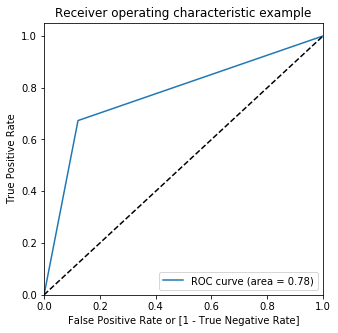

In [355]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

# Finding Optimal Cutoff Point

In [356]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.250528,2873,0,1,1,1,0,0,0,0,0,0,0
1,1,0.954665,6823,1,1,1,1,1,1,1,1,1,1,1
2,0,0.067419,7258,0,1,0,0,0,0,0,0,0,0,0
3,1,0.482334,8327,0,1,1,1,1,1,0,0,0,0,0
4,0,0.006741,5940,0,1,0,0,0,0,0,0,0,0,0


In [357]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376465  1.000000  0.000000
0.1   0.1  0.556224  0.967606  0.307849
0.2   0.2  0.729332  0.906184  0.622555
0.3   0.3  0.795692  0.822045  0.779782
0.4   0.4  0.805036  0.762726  0.830582
0.5   0.5  0.801077  0.673117  0.878334
0.6   0.6  0.794742  0.596130  0.914656
0.7   0.7  0.764175  0.455196  0.950724
0.8   0.8  0.742319  0.365587  0.969774
0.9   0.9  0.700348  0.223812  0.988062


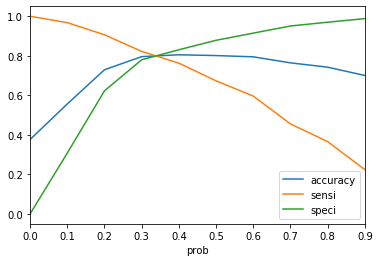

In [358]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [359]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.250528,2873,0,1,1,1,0,0,0,0,0,0,0,1
1,1,0.954665,6823,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.067419,7258,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.482334,8327,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.006741,5940,0,1,0,0,0,0,0,0,0,0,0,0


In [360]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8010769718086791

In [361]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3458,  479],
       [ 777, 1600]], dtype=int64)

In [362]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [363]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6731173748422381

In [364]:
# Let us calculate specificity
TN / float(TN+FP)

0.8783337566675133

In [365]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.12166624333248667


In [366]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7696007696007696


In [367]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8165289256198347


In [368]:
#####------------- END-----------------####